<a href="https://colab.research.google.com/github/imantoashwin/Intel_Industry_training_program-2024/blob/main/Intel_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bing-image-downloader

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
from bing_image_downloader import downloader
downloader.download("1920x1080 HD Imaages", limit=20, output_dir='images')

[%] Downloading Images to /content/images/1920x1080 HD Imaages


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://wallpaperaccess.com/full/284553.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.pixelstalk.net/wp-content/uploads/2016/06/Water-Clouds-Nature-Rivers-HD-Wallpaper-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.pixelstalk.net/wp-content/uploads/2016/07/Desktop-HD-Pictures-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://wallpaperaccess.com/full/284466.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.pixelstalk.net/wp-content/uploads/2016/07/1920x1080-Hd-Pictures-Download.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://wallpaperaccess.com/full/284616.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://getwallpapers.com/wallpaper/full/0/b/a/881893-hdr-wallpaper-1920x1080-1920x1080-for-ios.jpg
[%] File Downlo

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt

# Define the path to your dataset
dataset_path = 'images/1920x1080 HD Imaages'  # Make sure this path is correct

# Initialize lists to store the images and labels
images = []

# Function to resize image and maintain aspect ratio
def resize_with_aspect_ratio(image, target_size):
    img_ratio = image.size[0] / image.size[1]
    target_ratio = target_size[0] / target_size[1]

    if img_ratio > target_ratio:
        new_width = target_size[0]
        new_height = int(new_width / img_ratio)
    else:
        new_height = target_size[1]
        new_width = int(new_height * img_ratio)

    return image.resize((new_width, new_height), Image.ANTIALIAS)

In [ ]:
# Load and preprocess images
for filename in os.listdir(dataset_path):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        img_path = os.path.join(dataset_path, filename)
        try:
            img = Image.open(img_path)  # Convert image to grayscale
            img = resize_with_aspect_ratio(img, (1920, 1080))  # Resize while maintaining aspect ratio

            # Create a new image with the desired size and paste the resized image onto it
            new_img = Image.new("L", (1920, 1080))
            new_img.paste(img, ((1920 - img.size[0]) // 2, (1080 - img.size[1]) // 2))

            img_array = np.array(new_img).astype('float32') / 255  # Normalize image
            images.append(img_array)
        except Exception as e:
            print(f"Error processing image {filename}: {e}")  # Print error messages for debugging


<ipython-input-18-57b02d1e51a5>:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return image.resize((new_width, new_height), Image.ANTIALIAS)


In [ ]:
# Convert list to numpy array and reshape
if images:  # Check if any images were loaded
    images = np.array(images)
    images = images.reshape(-1, 1080, 1920, 1)

    # Split into training and testing sets
    x_train, x_test = train_test_split(images, test_size=0.2, random_state=42)
else:
    print("No images were loaded. Please check the dataset path and file formats.")

In [ ]:
# Introduce noise
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
from keras.optimizers import Adam
# Define the model
model = Sequential([
    # Encoder network
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(1080, 1920, 1)),
    MaxPooling2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    Conv2D(8, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    # Decoder network
    Conv2D(8, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(16, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    # Output layer
    Conv2D(1, 3, activation='tanh', padding='same')
])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy')
model.summary()

# Fit the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=1, validation_data=(x_test_noisy, x_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1080, 1920, 32)    320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 540, 960, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 540, 960, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 270, 480, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 270, 480, 8)       1160      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 135, 240, 8)       0

1/1 [==============================] - 0s 45ms/step


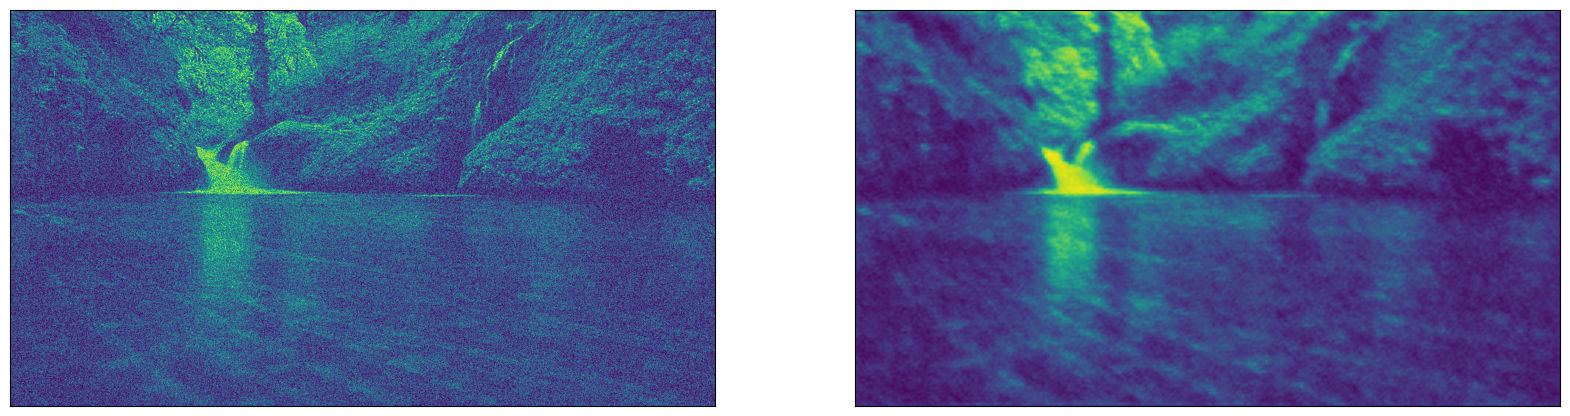

In [ ]:
# Predict and visualize
pred = model.predict(x_test_noisy)

index = np.random.randint(len(x_test))
plt.figure(figsize=(20, 8))
# Display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(1080, 1920))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# Display denoised image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(1080, 1920))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()
